### Once you've done some EDA, you may be ready to do some deeper analysis with a specific intent. Analytics can broadly be grouped into four areas.

### Four Types of Analytics
![chart](../images/4-types-of-data-analytics-01.png)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

#### Let's get some data and take a look

In [3]:
people_df = pd.read_csv('../data/people.csv')

In [4]:
people_df.head()

,name,age,sex,height,weight,bmi,sibling_count,birth_order,years_played_sports
0,Jin,15,M,66,165,26.63,4,5,5
1,Sue,24,F,62,136,24.87,2,1,10
2,Ellen,23,F,69,167,24.66,3,2,8
3,Tina,18,F,67,140,18.79,1,2,0
4,Jerry,47,M,66,182,29.37,1,1,5


### There are a number of statistics that help us understand the data
Recall the different descriptive statistics from the __eda_workflow__ slides
##### Statistics is decision making in the face of uncertainty or variablity
 - GOAL: can we understand the metrics that explain how many years a person played sports?

We had previously looked at outliers for `years_played_sports`":

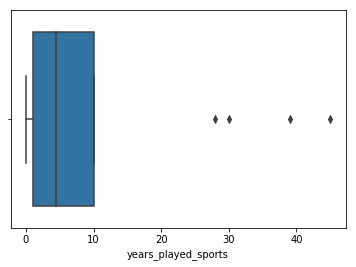

In [5]:
sns.boxplot(people_df.years_played_sports);

### [Correlations](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) help us understand if variables _may_ have an underlying relationship
- a perfect positive correlation is 1.0
- a perfect negative correlation is -1.0
- interpreting correlation depends on the context and purpose!


In [16]:
people_df.corr()

,age,height,weight,bmi,sibling_count,birth_order,years_played_sports
age,1.000000,0.082854,0.397250,0.483920,0.213725,0.009498,0.519108
height,0.082854,1.000000,0.704878,-0.067294,-0.120820,-0.138470,-0.246262
weight,0.397250,0.704878,1.000000,0.619360,-0.207801,-0.294352,-0.209591
bmi,0.483920,-0.067294,0.619360,1.000000,-0.095000,-0.230864,0.007252
sibling_count,0.213725,-0.120820,-0.207801,-0.095000,1.000000,0.788092,0.683269
birth_order,0.009498,-0.138470,-0.294352,-0.230864,0.788092,1.000000,0.408912
years_played_sports,0.519108,-0.246262,-0.209591,0.007252,0.683269,0.408912,1.000000


 - Which variables in our dataset are most highly correlated with each other?
 - Which variables might explain the variability in `years_played_sports`?

#### Correlations can be visualized as well

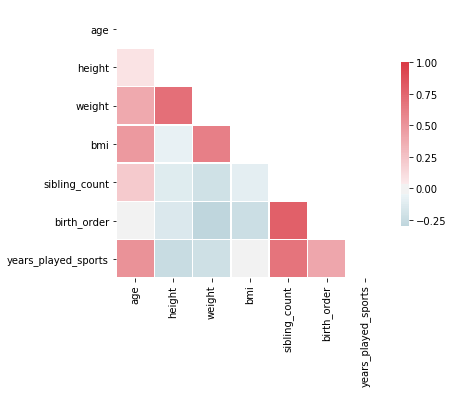

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = people_df.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Normalization
 - Does the `years_played_sports` variable have the same meaning for all people in the dataset? Is a 70 yo with 5 years of sports the same as a 20 yo with 5 years of sports?
 - How would you normalize it?

In [6]:
people_df['pct_life_sports'] = people_df.years_played_sports/people_df.age

In [7]:
people_df.corr()

,age,height,weight,bmi,sibling_count,birth_order,years_played_sports,pct_life_sports
age,1.000000,0.082854,0.397250,0.483920,0.213725,0.009498,0.519108,0.162176
height,0.082854,1.000000,0.704878,-0.067294,-0.120820,-0.138470,-0.246262,-0.300859
weight,0.397250,0.704878,1.000000,0.619360,-0.207801,-0.294352,-0.209591,-0.350483
bmi,0.483920,-0.067294,0.619360,1.000000,-0.095000,-0.230864,0.007252,-0.119337
sibling_count,0.213725,-0.120820,-0.207801,-0.095000,1.000000,0.788092,0.683269,0.774994
birth_order,0.009498,-0.138470,-0.294352,-0.230864,0.788092,1.000000,0.408912,0.573389
years_played_sports,0.519108,-0.246262,-0.209591,0.007252,0.683269,0.408912,1.000000,0.863875
pct_life_sports,0.162176,-0.300859,-0.350483,-0.119337,0.774994,0.573389,0.863875,1.000000


- Correlation between a variable you are trying to explain (sometimes called the dependent variable or target) and a variable that might explain it (independent variable or explanatory variable) helps us understand the target better.  
- Correlation between two explanatory variables may cause us to overestimate their importance to explaining the variance in the target. Think about _why_ variables might be highly correlated.
 

### Feature Engineering
#### This is the process of defining new features that are not part of the original dataset. These could be through combining existing features or from an external dataset.

##### Some examples could be:
- Number of sports leagues in birth city
- Financial means (e.g.: IRS data for average income)
- Calculate the number of older/younger siblings
- Liklihood have children (based on age)

_For example purposes, we'll synthesize some data. In practice, these would be available as other tables or you would find them_

In [14]:
people_df['num_sports_teams'] = [random.randint(50, 200) for i in range(len(people_df))]

In [17]:
people_df['fam_tax_rate'] = [random.choice([.1, .12, .22, .24, .32, .35, .37]) for i in range(len(people_df))]

In [22]:
people_df['num_younger_sib'] = (people_df['sibling_count']+1) - people_df['birth_order']

In [24]:
people_df['num_older_sib'] = people_df['sibling_count'] - people_df['num_younger_sib']

In [25]:
people_df.head()

,name,age,sex,height,weight,bmi,sibling_count,birth_order,years_played_sports,pct_life_sports,num_sports_teams,fam_tax_rate,num_younger_sib,num_older_sib
0,Jin,15,M,66,165,26.63,4,5,5,0.333333,71,0.24,0,4
1,Sue,24,F,62,136,24.87,2,1,10,0.416667,85,0.22,2,0
2,Ellen,23,F,69,167,24.66,3,2,8,0.347826,119,0.24,2,1
3,Tina,18,F,67,140,18.79,1,2,0,0.000000,63,0.32,0,1
4,Jerry,47,M,66,182,29.37,1,1,5,0.106383,77,0.24,1,0
